Loading the Dataset and loading dataset into a dataframe.

In [97]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

plt.style.use('ggplot')
# Load the dataset (change path)
df = pd.read_csv('/Users/apple/Documents/SPRING\'24/ECS 171/final project/BCdata.csv')

Data Preprocessing:
>Cleaning the data -removing column id and column Unnamed:32

In [88]:
# Data preprocessing
df.drop(['id','Unnamed: 32'], axis = 1, inplace = True)
# if Malignant(M):1, if benign(B):0
df['diagnosis']=df['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [89]:
#describe the data
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [98]:
# check for null values  
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

>From the above, therefore there are no null values

Exploratory Data Analysis(EDA) :

In [91]:
# Plotting the features and values
plt.figure(figsize=(80, 80))

for plotnumber, column in enumerate(df.columns, start=1):
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True, color='skyblue', bins=30)
        
        ax.set_ylabel('Measure', fontsize=50)  # Set y-axis label
        ax.set_xlabel(column, fontsize=50)     # Set x-axis label
        ax.tick_params(labelsize=40)  # Increase tick label font size

plt.tight_layout()
plt.show()

Check Correlations:

In [92]:
# checking for outliers using boxplots and calculating the data skewedness

plt.figure(figsize=(80, 80))
plotnumber = 1

for plotnumber, column in enumerate(df.columns, start=1):
    if plotnumber <= 30:
        
        ax = plt.subplot(5, 6, plotnumber)
        sns.histplot(df[column], kde=True, color='skyblue', bins=30)
        
        ax.set_ylabel('Measure', fontsize=50)  # Set y-axis label
        ax.set_xlabel(column, fontsize=50)     # Set x-axis label
        ax.tick_params(labelsize=40)  # Increase tick label font size
        
        # box plot for detecting outliers
        plt.twinx()
        sns.boxplot(x=df[column], color='orange', linewidth=1)
        plt.ylabel('')
        
        # skewness
        skewness = df[column].skew()
        plt.title(f'Skewness: {skewness:.2f}', fontsize=40)  # Increase title font size

plt.tight_layout()
plt.show()

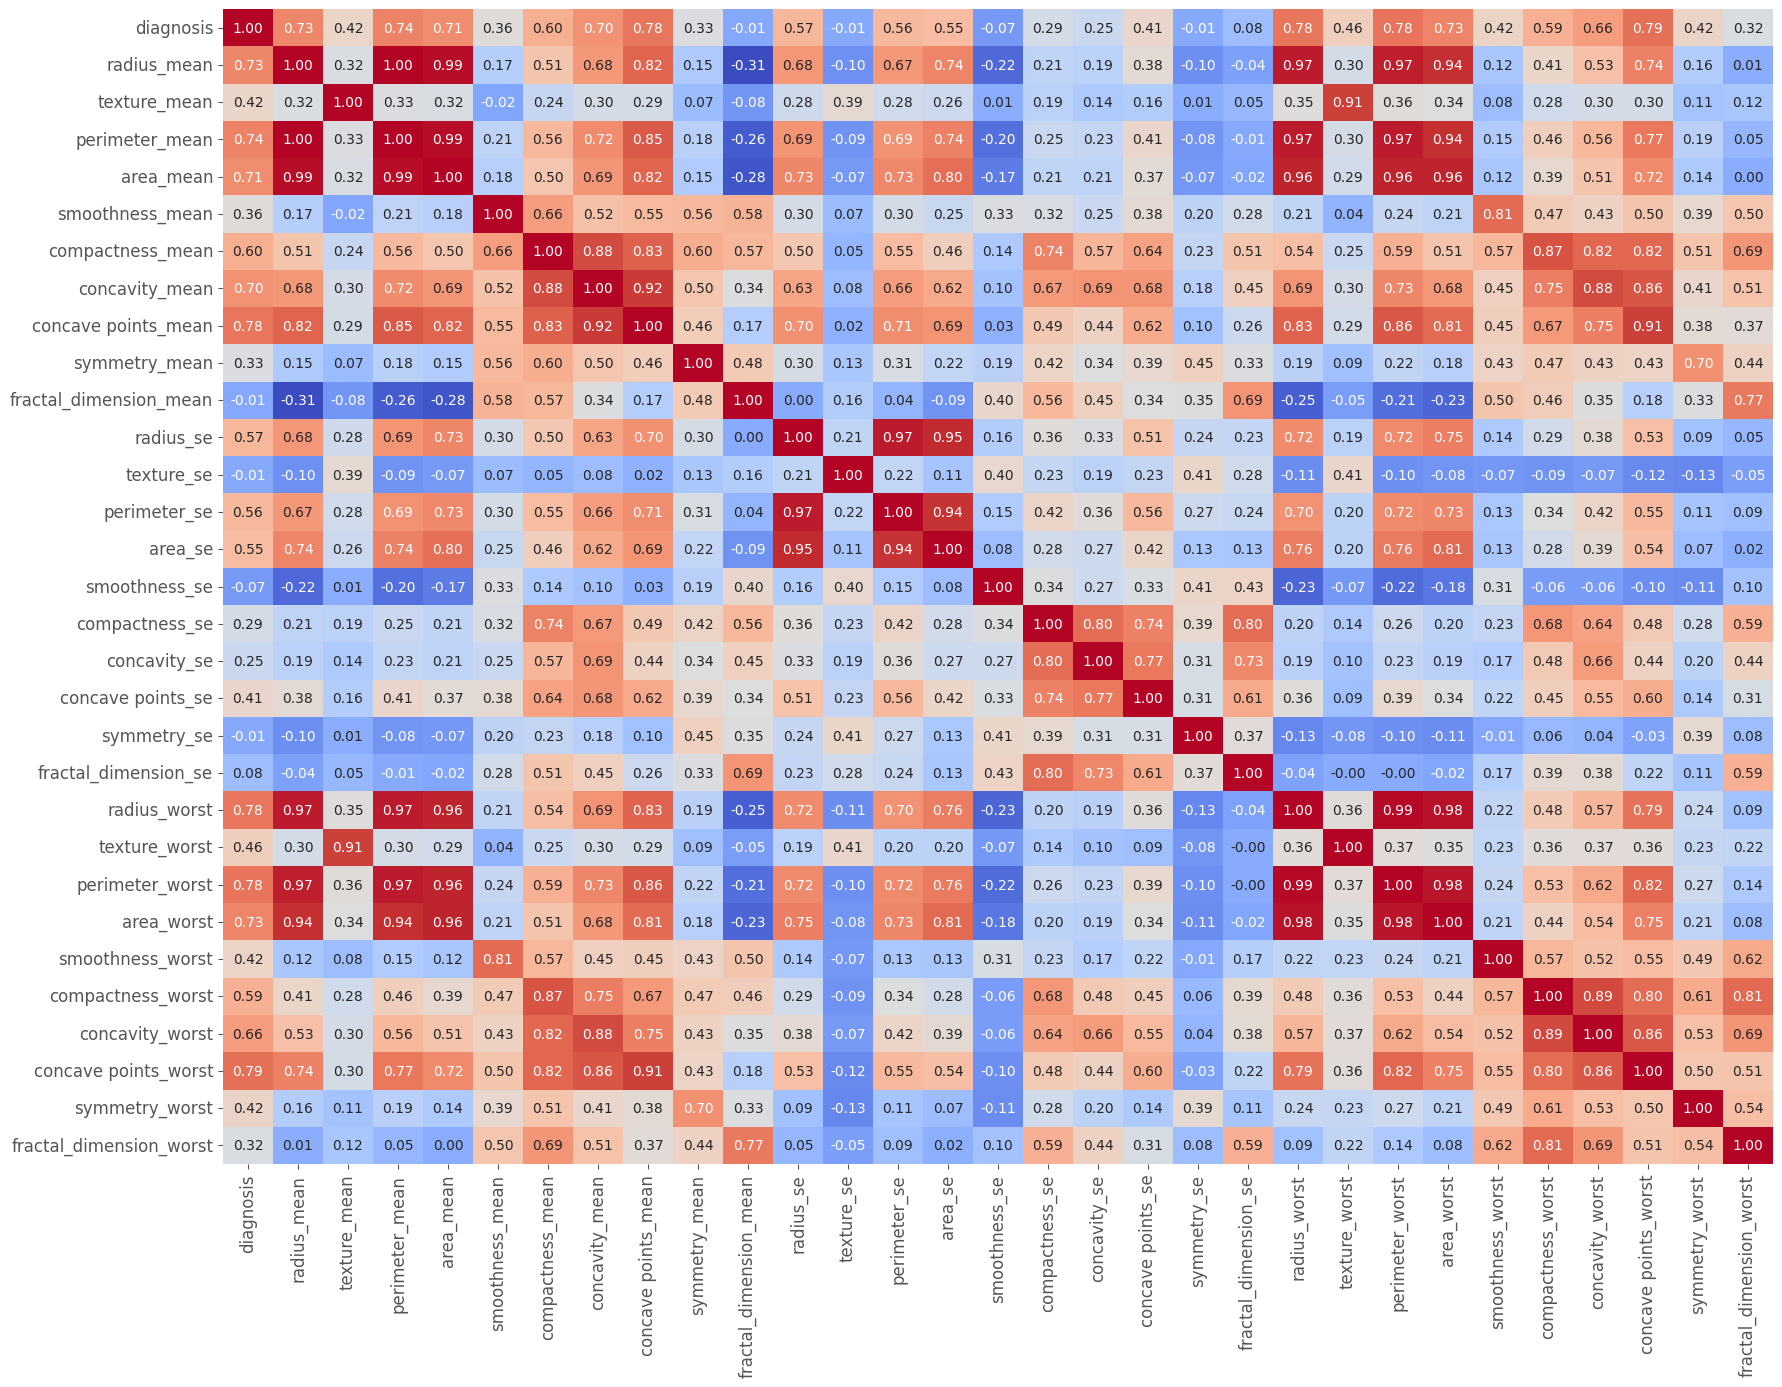

In [93]:
# Check if features are uncorrelated:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

We see from the correlational matrix, that many features are correlated.

Removing Highly correlated features

In [95]:
# Remove highly correlated features
correlation_mat = df.corr()
#correlation threshold
threshold = 0.95 #setting to 0.95

highly_correlated = correlation_mat[abs(correlation_mat) > threshold]
highly_correlated = highly_correlated[highly_correlated != 1].stack().index.tolist()

# which ones to remove
remove = set()
for (feature1, feature2) in highly_correlated:
    remove.add(feature1 if correlation_mat.loc[feature1, feature2] > 0 else feature2)

# drop highly correlated features from the dataframe
df = df.drop(remove, axis=1)

print(df)
print(f"The new dataframe has {df.shape[1]} columns")


     diagnosis  texture_mean  smoothness_mean  compactness_mean  \
0            1         10.38          0.11840           0.27760   
1            1         17.77          0.08474           0.07864   
2            1         21.25          0.10960           0.15990   
3            1         20.38          0.14250           0.28390   
4            1         14.34          0.10030           0.13280   
..         ...           ...              ...               ...   
564          1         22.39          0.11100           0.11590   
565          1         28.25          0.09780           0.10340   
566          1         28.08          0.08455           0.10230   
567          1         29.33          0.11780           0.27700   
568          0         24.54          0.05263           0.04362   

     concavity_mean  concave points_mean  symmetry_mean  \
0           0.30010              0.14710         0.2419   
1           0.08690              0.07017         0.1812   
2           0.1974